In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [22]:
#create a df
df_can = pd.read_excel('Canada_Revised.xlsx')
df_can.head(5)


,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


In [23]:
df_can.shape

(195, 38)

In [24]:
# change the index to country from numerical values
df_can.set_index('Country',inplace = True)

In [37]:
#extract data for Haiti

year = list(range(1980,2014)) #(inclusive, exclusive)
haiti = df_can.loc['Haiti', year]

In [40]:
print(haiti.shape)
type(haiti)

(34,)


pandas.core.series.Series

In [31]:
haiti.head()

1980    1666
1981    3692
1982    3498
1983    2860
1984    1418
Name: Haiti, dtype: object

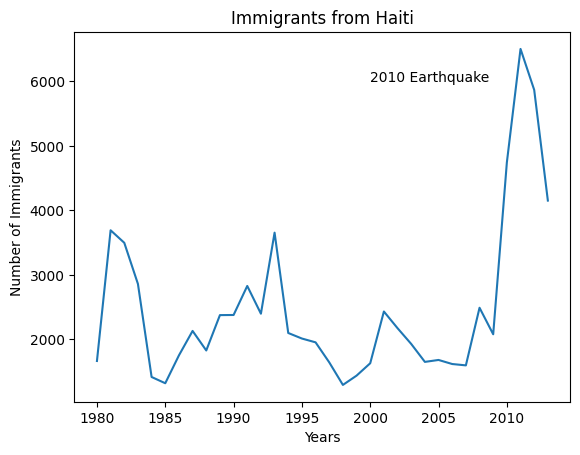

In [10]:
# change the index bacl to int values
haiti.index = haiti.index.map(int)
haiti.plot (kind = 'line')
plt.title('Immigrants from Haiti')
plt.xlabel('Years')
plt.ylabel('Number of Immigrants')
plt.text (2000,6000, '2010 Earthquake')
plt.show()

<class 'pandas.core.series.Series'>


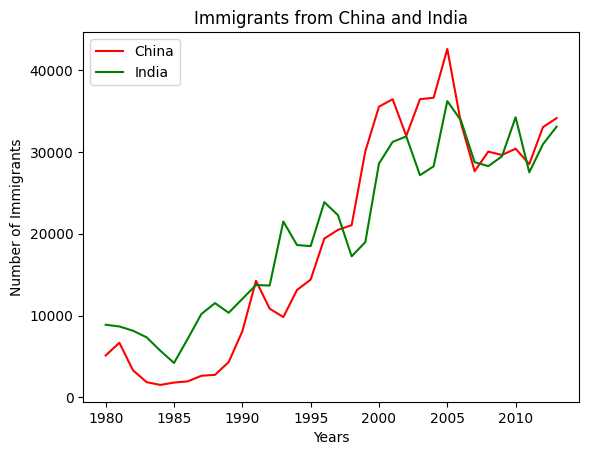

In [42]:
# change the index to country from numerical values
India = df_can.loc['India', year]
China = df_can.loc['China', year]
print(type(India))
#India.index = India.index.map(int)
#China.index = China.index.map(int)
China.plot (kind = 'line', color = 'red')
India.plot (kind = 'line', color = 'green')
plt.title('Immigrants from China and India')
plt.xlabel('Years')
plt.ylabel('Number of Immigrants')
plt.legend(loc = 'upper left')
plt.show()

<class 'numpy.ndarray'>


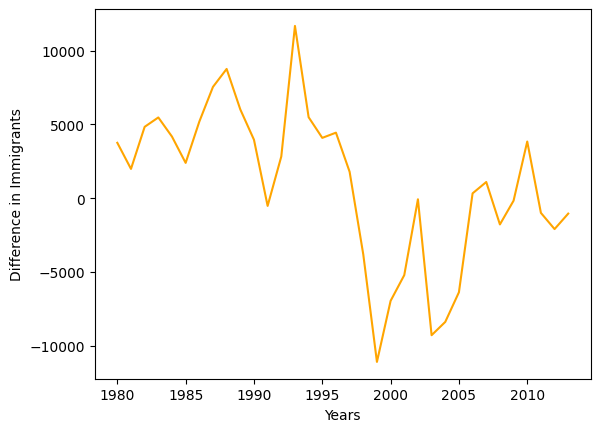

In [43]:
difference = np.array(India-China)
print(type(difference))
plt.plot(year,difference, color = 'orange')
plt.xlabel('Years')
plt.ylabel('Difference in Immigrants')
plt.show()

Compare the trends of the top 5 countries that contributed the most to immigration to Canada

In [57]:
#sort the dataframe by total in descending order
df_can['Total'] = df_can.sum(axis = 1, numeric_only = True)


In [62]:
df_can.sort_values (by = 'Total', ascending = False, axis = 0, inplace = True)

dftop5 = df_can.head(5)
df_can.head(-5)


,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,1383808
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,1319924
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,1103000
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,1022782
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,483200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Kiribati,Oceania,Micronesia,Developing regions,0,0,0,1,0,0,0,...,1,0,0,1,1,0,0,2,0,30
Vanuatu,Oceania,Melanesia,Developing regions,0,0,0,0,0,0,0,...,1,1,0,0,1,0,0,0,0,22
Sao Tome and Principe,Africa,Middle Africa,Developing regions,0,0,0,0,0,0,0,...,1,1,0,0,1,2,0,0,1,20


In [63]:
dftop5 = dftop5[year].transpose()
print(dftop5)

Country  India  China  United Kingdom of Great Britain and Northern Ireland  \
1980      8880   5123                                              22045      
1981      8670   6682                                              24796      
1982      8147   3308                                              20620      
1983      7338   1863                                              10015      
1984      5704   1527                                              10170      
1985      4211   1816                                               9564      
1986      7150   1960                                               9470      
1987     10189   2643                                              21337      
1988     11522   2758                                              27359      
1989     10343   4323                                              23795      
1990     12041   8076                                              31668      
1991     13734  14255                               

<class 'pandas.core.frame.DataFrame'>


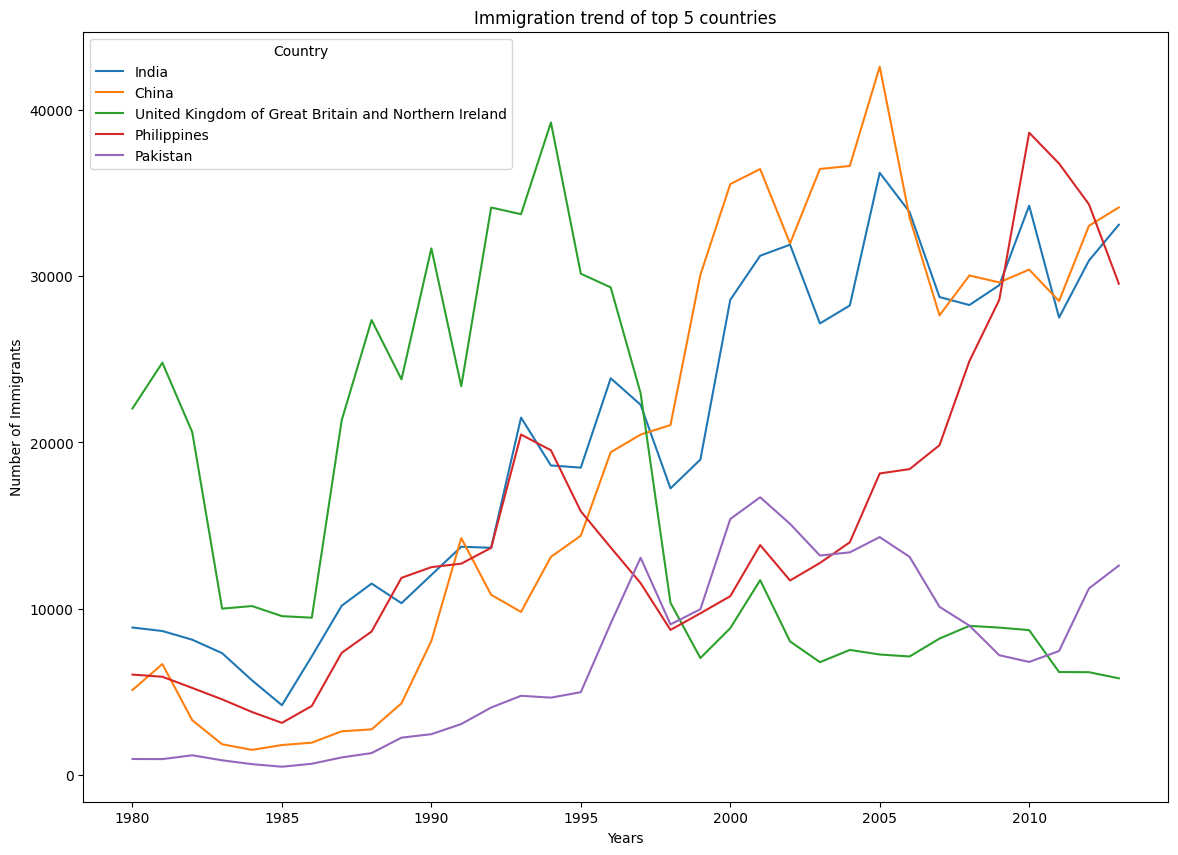

In [65]:
#dftop5.index = dftop5.index.map(int)
print(type(dftop5))
dftop5.plot(kind ='line', figsize = (14,10))
plt.title('Immigration trend of top 5 countries')
plt.xlabel('Years')
plt.ylabel('Number of Immigrants')
plt.show()

In [78]:
# group countries by continents and apply the sum() function
df_continents = df_can.groupby('Continent', axis = 0).sum(numeric_only = True)


In [79]:
df_continents.shape

(6, 35)

In [81]:
df_continents.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,1237896
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,6635588
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,2821894
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,1530296
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,482284


<function matplotlib.pyplot.show(close=None, block=None)>

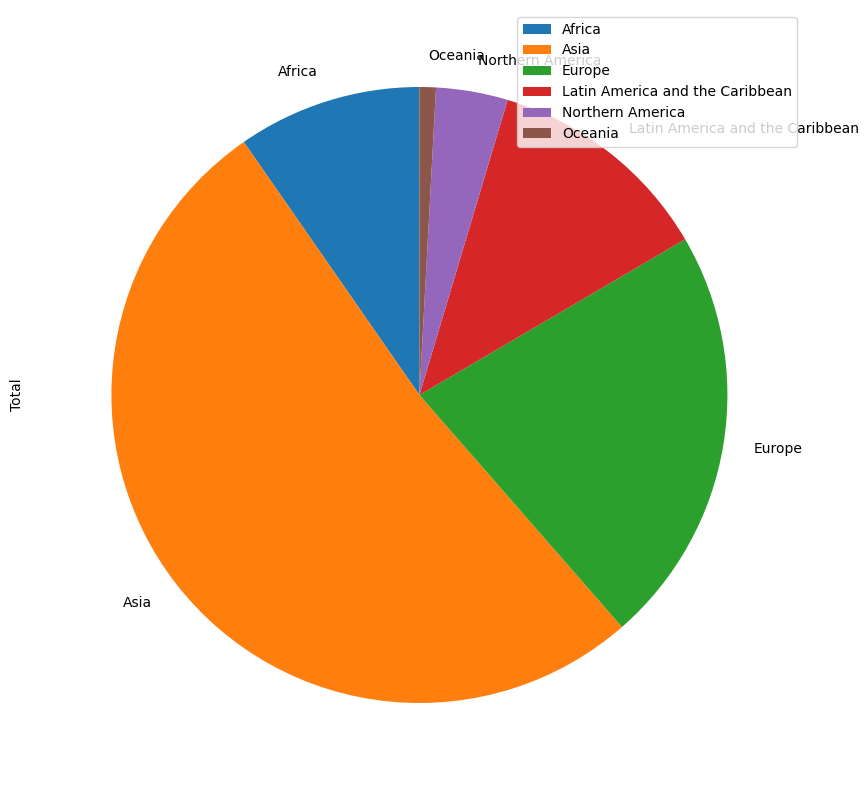

In [18]:
# draw a pie chart

df_continents['Total'].plot(kind = 'pie', figsize = (20,10), startangle = 90)
plt.legend(labels = df_continents.index, loc = 'upper right')
plt.show

In [86]:
df_japan = df_can.loc[['Japan'],year].transpose()
df_japan.head()

Country,Japan
1980,701
1981,756
1982,598
1983,309
1984,246


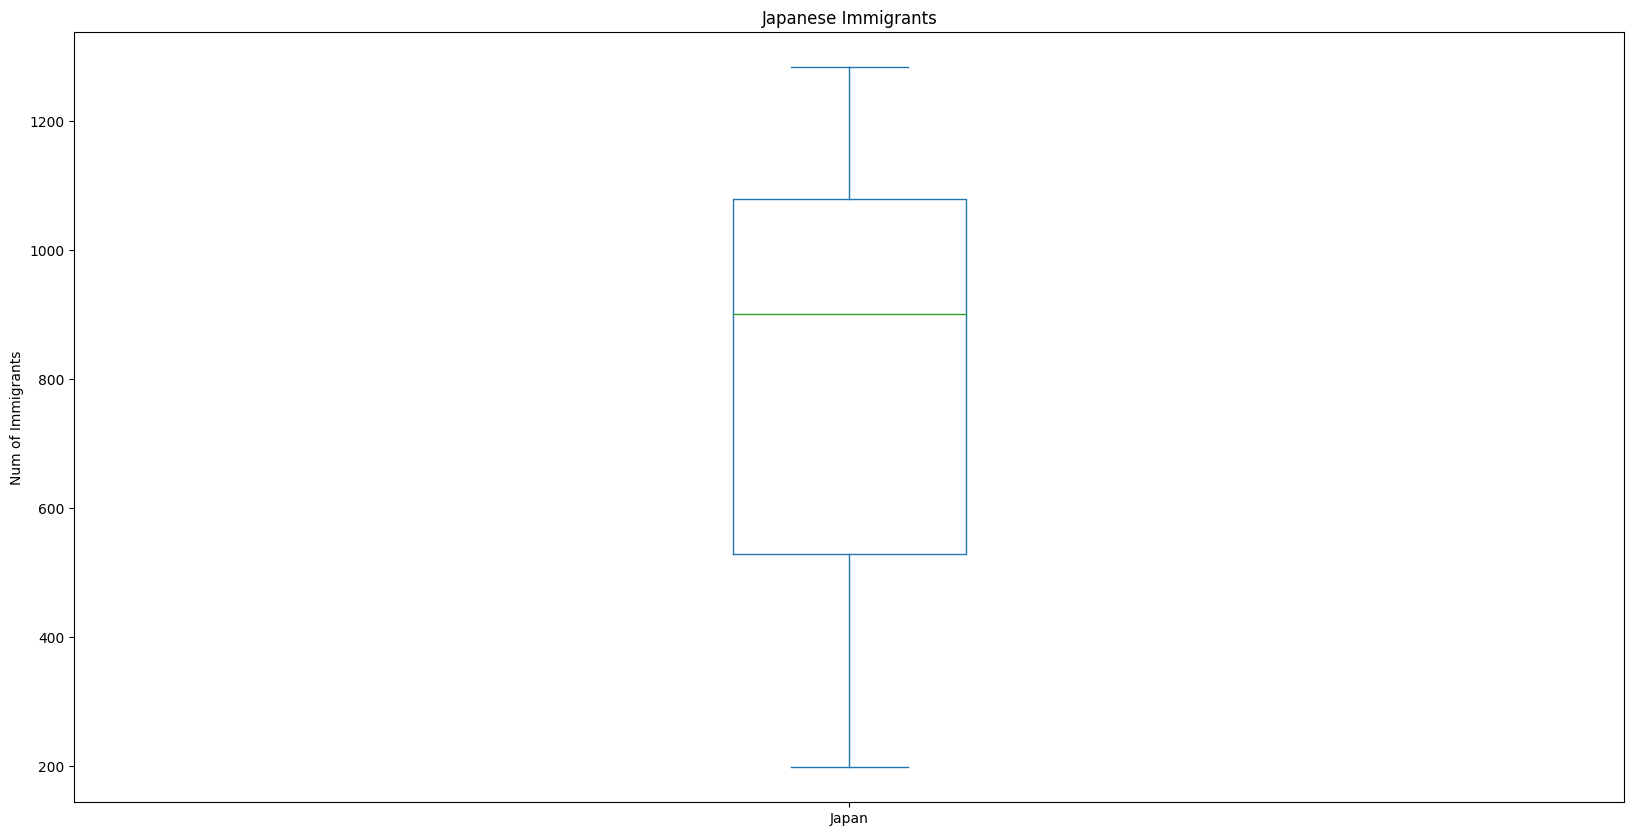

In [87]:
df_japan.plot(kind = 'box', figsize = (20,10))
plt.title('Japanese Immigrants')
plt.ylabel('Num of Immigrants')
plt.show()